In [38]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab as pl

In [2]:
data = pd.read_csv('followers.csv')

In [3]:
data.columns.values


array(['Unnamed: 0', 'data_properties.twitter_followers',
       'data_properties.facebook_followers',
       'data_properties.instagram_followers', 'data_properties.ppp_country'], dtype=object)

In [4]:
data = data.drop(['Unnamed: 0'],axis=1)

In [5]:
collection = data

In [6]:
data.head()

,data_properties.twitter_followers,data_properties.facebook_followers,data_properties.instagram_followers,data_properties.ppp_country
0,57518,47636,10836,42609
1,161302,0,0,57467
2,151333,2509088,574057,42609
3,52980,46268,4560,42609
4,158313,330064,75019,57467


In [7]:
data = data.replace(0,np.nan)
data = data.dropna(how='any',axis=0)

In [39]:
graph_data = sorted(data['data_properties.instagram_followers'])

In [40]:
fit = stats.norm.pdf(graph_data,np.mean(graph_data),np.std(graph_data))

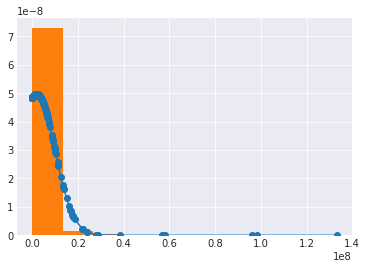

In [41]:
pl.plot(graph_data,fit,'-o')
pl.hist(graph_data,normed=True)
pl.show()

In [42]:
instagram_followers = np.log1p(graph_data)

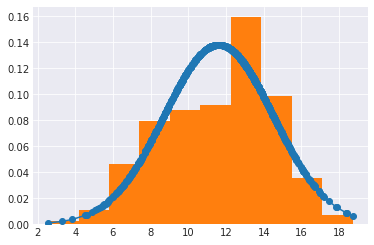

In [46]:
fit = stats.norm.pdf(instagram_followers,np.mean(instagram_followers),np.std(instagram_followers))
pl.plot(instagram_followers,fit,'-o')
pl.hist(instagram_followers,normed=True)
pl.show()

In [48]:
data.columns

Index(['data_properties.twitter_followers',
       'data_properties.facebook_followers',
       'data_properties.instagram_followers', 'data_properties.ppp_country'],
      dtype='object')

In [49]:
data['data_properties.instagram_followers'] = np.log1p(data['data_properties.instagram_followers'])